# Benchmarking
For each configuration, the simulation was run four times. Out of these computation times the average was taken for each configuration. The simulation setup as defined in [namelist.py](optimized/nmwc_model_optimized/namelist.py) was used for both the unoptimized and the optimized version (5040 gridpoints). The tim was measured from the start of the first iteration, until the end of the last iteration of the main loop. The unit used is seconds.

In [1]:
!pip install uncertainties numpy matplotlib

   ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/58.3 kB ? eta -:--:--
   --------------------- ------------------ 30.7/58.3 kB 325.1 kB/s eta 0:00:01
   ----------------------------------- ---- 51.2/58.3 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 58.3/58.3 kB 384.2 kB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from uncertainties import ufloat

In [4]:
unoptimized_times = np.array([1102.5, 1169.72, 1170.56, 1201.48]) # [s]
optimized_workers = np.array([2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20,21,24])
# [s], each line corresponds the the respective number of workers as defined in `optimized_workers`
optimized_times = np.array([
    [867.175, 1043.94, 669.272, 631.248],
    [396.371, 362.884, 424.522, 333.862],
    [290.84, 366.12, 369.404, 387.62],
    [276.844, 278.664, 276.702, 271.525],
    [306.272, 279.813, 311.108, 268.712],
    [282.879, 290.595, 262.531, 262.941],
    [293.602, 271.057, 271.87,273.388],
    [248.847, 250.257, 250.807, 247.288],
    [219.458, 220.41, 224.357, 222.409],
    [228.274, 230.376, 229.814, 230.318],
    [274.099, 248.671, 246.815, 247.574],
    [259.591, 263.845, 259.723, 257.76],
    [265.542, 262.791, 263.226, 267.7],
    [270.283, 272.403, 274.144, 273.036],
])

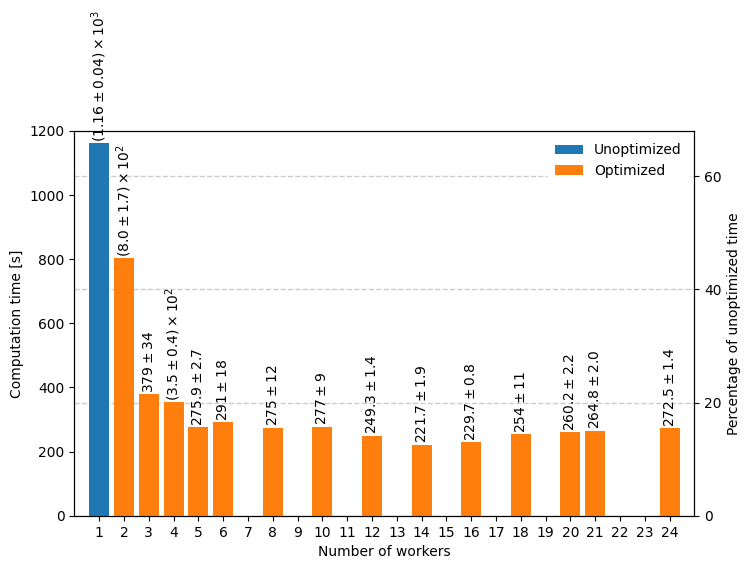

In [6]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

percentages = np.arange(0, 101, 20)

ax1.bar([1], np.mean(unoptimized_times), label="Unoptimized")
ax1.bar(optimized_workers, optimized_times.mean(axis=1), label="Optimized")

ax1b = ax1.twinx()
ax1b.hlines(percentages, 0, 25, "k", "dashed", linewidth=1, alpha=0.2)

ax1.text(1, np.mean(unoptimized_times) + 5, f"${ufloat(unoptimized_times.mean(), unoptimized_times.std()):L}$", 
             horizontalalignment="center", verticalalignment="bottom", rotation=90)
for workers, entry in zip(optimized_workers, optimized_times):
    time = entry.mean()
    std = entry.std()
    ax1.text(workers, time + 5, f"${ufloat(entry.mean(), entry.std()):L}$", 
             horizontalalignment="center", verticalalignment="bottom", rotation=90)

ax1.set_xlabel("Number of workers")
ax1.set_ylabel("Computation time [s]")
ax1b.set_ylabel("Percentage of unoptimized time")
ax1.legend(framealpha=1, edgecolor="white").get_frame().set_boxstyle('Square', pad=0.1)
ax1.set_xticks(np.arange(1, 25, 1))
ax1b.set_yticks(percentages)
ax1.set_ylim(0, 1200)
ax1.set_xlim(0, 25)
ax1b.set_ylim(0, 100 / np.mean(unoptimized_times) * 790)
ax1.set_zorder(2)
ax1b.set_zorder(1)
ax1.patch.set_visible(False)